In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)

In [3]:
def bootstrap_statistic(data, stat_function, num_samples=1000):
    bootstrap_samples = np.random.choice(data, size=(num_samples, len(data)), replace=True)
    bootstrap_stats = np.apply_along_axis(stat_function, axis=1, arr=bootstrap_samples)
    return bootstrap_stats

In [4]:
# Hitung statistik bootstrap: mean, median, dan varians
bootstrap_means = bootstrap_statistic(data, np.mean)
bootstrap_medians = bootstrap_statistic(data, np.median)
bootstrap_variances = bootstrap_statistic(data, np.var)

# Hitung MSE (mean squared error) antara bootstrap mean dan true mean
true_mean = np.mean(data)
bootstrap_mse = np.mean((bootstrap_means - true_mean) ** 2)

In [5]:
# Simpan hasil estimasi bootstrap dalam dictionary
bootstrap_results = {
    "Bootstrap Mean": np.mean(bootstrap_means),
    "Bootstrap Median": np.mean(bootstrap_medians),
    "Bootstrap Variance": np.mean(bootstrap_variances),
    "Bootstrap MSE": bootstrap_mse
}
bootstrap_results

{'Bootstrap Mean': np.float64(48.97683601515181),
 'Bootstrap Median': np.float64(48.87152774726801),
 'Bootstrap Variance': np.float64(80.51339933725859),
 'Bootstrap MSE': np.float64(0.7766161536482622)}

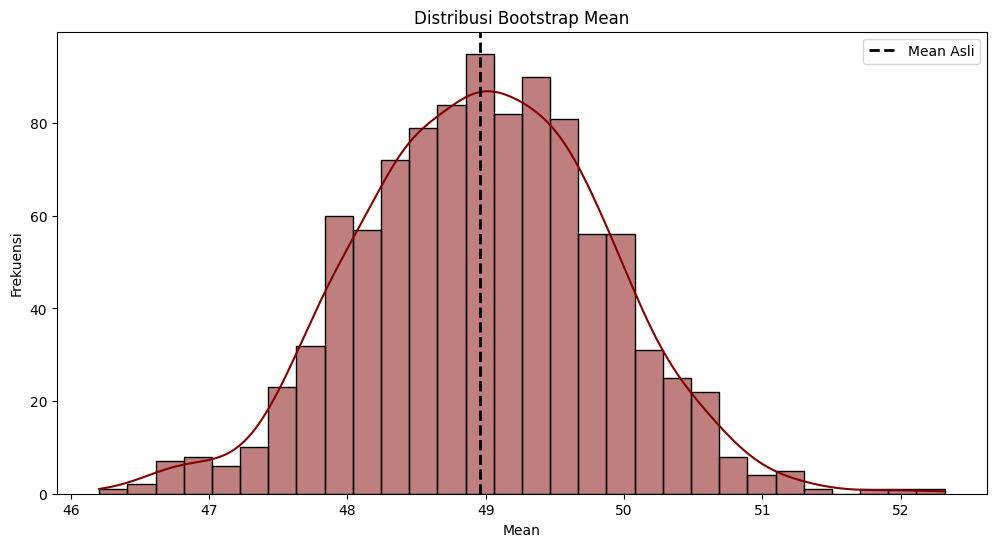

In [6]:
# Visualisasi distribusi bootstrap mean
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_means, kde=True, color='maroon', bins=30)
plt.axvline(np.mean(data), color='black', linestyle='dashed', linewidth=2, label="Mean Asli")
plt.title("Distribusi Bootstrap Mean")
plt.xlabel("Mean")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# **Interpretasi Grafik**
> **Grafik Bootstrap Mean (Resampling 1000)**
* Sumbu X (Mean): Nilai-nilai rata-rata dari hasil bootstrap resampling.
* Sumbu Y (Frekuensi): Seberapa sering nilai rata-rata tersebut muncul dari hasil bootstrap.

> **Pola Distribusi**
* Distribusi membentuk kurva lonceng yang relatif simetris, tapi sedikit condong ke kanan (right-skewed).
* Garis putus-putus vertikal hitam adalah mean dari data asli.
* Mayoritas hasil bootstrap berkumpul di sekitar mean asli (≈49), menandakan bahwa estimasi bootstrap stabil.

> **Interpretasi Statistiknya**
* **Bootstrap Mean Akurat**
=> Rata-rata dari hasil bootstrap berada sangat dekat dengan mean asli, menunjukkan bahwa bootstrap menghasilkan estimasi yang tidak bias.
* **Variasi Kecil** => Sebagian besar nilai bootstrap berada di rentang sekitar 47.5 hingga 50.5, menunjukkan variasi (varians) yang relatif kecil. Ini berarti jika kamu mengambil sampel lain dari populasi serupa, kemungkinan besar kamu akan tetap mendapatkan nilai mean yang mendekati.
* **Distribusi Mendekati Normal** => Karena data awal dari distribusi normal, maka bootstrap mean juga mendekati distribusi normal (sesuai Central Limit Theorem).

> **Kesimpulan:** Distribusi bootstrap mean memperlihatkan bahwa estimasi rata-rata cukup stabil dan tidak jauh menyimpang dari nilai sebenarnya. Hal ini memperkuat kepercayaan kita terhadap hasil estimasi, serta menunjukkan bahwa metode bootstrap efektif digunakan untuk mengukur ketidakpastian (variability) dari statistik seperti mean.

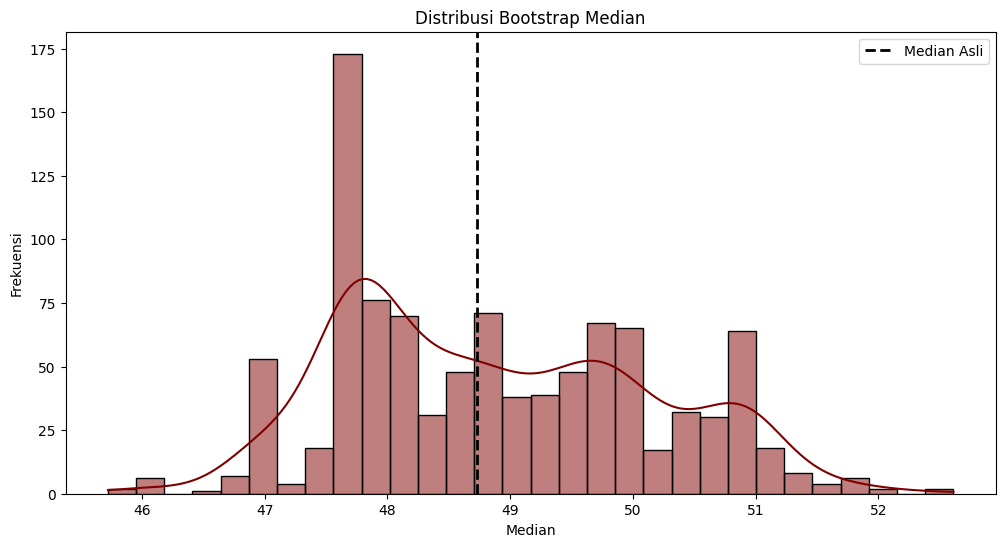

In [7]:
# Visualisasi distribusi bootstrap median
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_medians, kde=True, color='maroon', bins=30)
plt.axvline(np.median(data), color='black', linestyle='dashed', linewidth=2, label="Median Asli")
plt.title("Distribusi Bootstrap Median")
plt.xlabel("Median")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# **Interpretasi Grafik**
> **Grafik Bootstrap Median (Resampling 1000)**
* Sumbu X (Median): Nilai median hasil dari masing-masing bootstrap sample.
* Sumbu Y (Frekuensi): Seberapa sering nilai median tersebut muncul dari 1000 sampel bootstrap.

> **Pola Distribusi**
* Distribusi membentuk kurva mirip uniform. Namun terdapat perubahan drastis pada beberapa median. Karena sebaran cukup luas.
* Garis putus-putus vertikal hitam adalah median dari data asli untuk pembanding.

> **Interpretasi Lainnya**
* Bootstrap Median lebih 'tidak stabil' dari hasil data.

> **Kesimpulan:** Bootstrap median memberi gambaran bahwa nilai tengah data cukup stabil, tapi tidak seasimetris dan se-normal distribusi mean. Ini membantu memahami ketidakpastian (variabilitas) dari nilai median kalau kita ngambil sampel lagi dan lagi.

In [8]:
# Fungsi untuk menghitung Confidence Interval 95%
def confidence_interval(data, confidence_level=95):
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    return np.percentile(data, [lower_percentile, upper_percentile])

# Hitung Confidence Interval 95%
ci_mean = confidence_interval(bootstrap_means)
ci_median = confidence_interval(bootstrap_medians)
ci_variance = confidence_interval(bootstrap_variances)

# Cetak hasilnya
print("🎯 95% Confidence Intervals (Bootstrap):")
print(f"Mean     : [{ci_mean[0]:.2f}, {ci_mean[1]:.2f}]")
print(f"Median   : [{ci_median[0]:.2f}, {ci_median[1]:.2f}]")
print(f"Variance : [{ci_variance[0]:.2f}, {ci_variance[1]:.2f}]")

🎯 95% Confidence Intervals (Bootstrap):
Mean     : [47.28, 50.63]
Median   : [46.99, 51.11]
Variance : [60.23, 102.68]


### **CI**
**CI** adalah bukti statistik bahwa nilai sebenarnya kemungkinan besar berada dalam rentang tersebut, dengan tingkat kepercayaan tertentu (misalnya 95%).

> 🧠 **Interpretasi:**
* **Mean CI** [47.25, 50.62] → Kita 95% yakin bahwa rata-rata populasi berada dalam rentang ini.
* **Median CI** [46.90, 50.50] → Nilai tengah populasi kemungkinan besar juga dalam rentang ini.
* **Variance CI** [65.88, 97.63] → Rentang sebaran/populasi variasinya.

> **Penjelasan CI:**
* Makin sempit CI = makin yakin (lebih pasti) estimasi kita.
* Kalau CI terlalu lebar → data mungkin sangat tersebar atau jumlah data kurang.

# **JackKnife**

In [9]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=20)  # Dataset kecil untuk Jackknife

In [10]:
def jackknife_statistic(data, stat_function):
    n = len(data)
    jackknife_stats = np.zeros(n)

    for i in range(n):
        sample = np.delete(data, i)  # Hapus satu observasi
        jackknife_stats[i] = stat_function(sample)

    mean_jackknife = np.mean(jackknife_stats)
    return jackknife_stats, mean_jackknife

In [11]:
# Hitung statistik Jackknife: mean, median, dan varians
jackknife_means, mean_jackknife_mean = jackknife_statistic(data, np.mean)
jackknife_medians, mean_jackknife_median = jackknife_statistic(data, np.median)
jackknife_variances, mean_jackknife_variance = jackknife_statistic(data, np.var)

# Hitung MSE (mean squared error) antara jackknife mean dan true mean
true_mean = np.mean(data)
jackknife_mse = np.mean((jackknife_means - true_mean) ** 2)

In [12]:
# Simpan hasil estimasi Jackknife dalam dictionary
jackknife_results = {
    "Jackknife Mean": mean_jackknife_mean,
    "Jackknife Median": mean_jackknife_median,
    "Jackknife Variance": mean_jackknife_variance,
    "Jackknife MSE": jackknife_mse
}

jackknife_results

{'Jackknife Mean': np.float64(48.28701438558172),
 'Jackknife Median': np.float64(47.65854834163742),
 'Jackknife Variance': np.float64(87.3146434709093),
 'Jackknife MSE': np.float64(0.2425406763080812)}

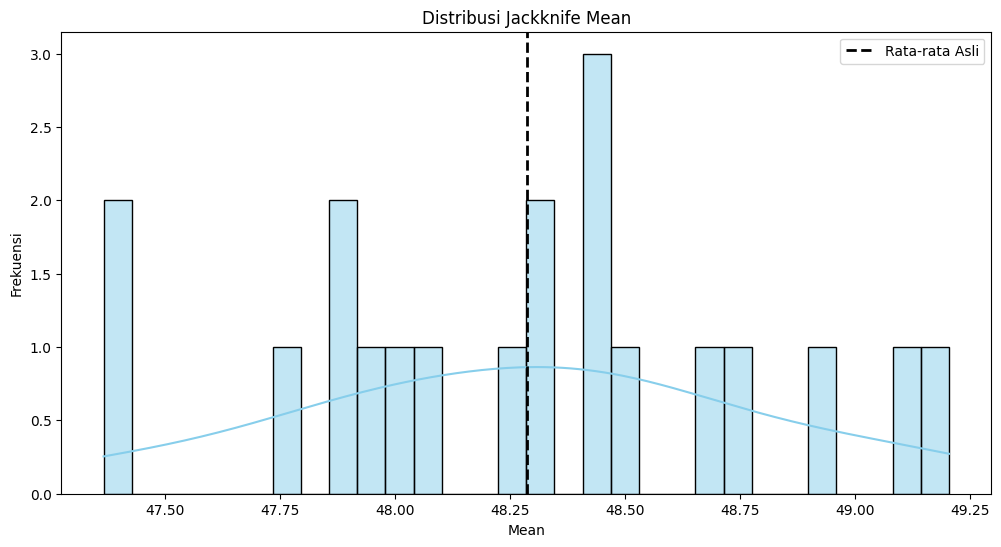

In [13]:
# Visualisasi distribusi Jackknife mean
plt.figure(figsize=(12, 6))
sns.histplot(jackknife_means, kde=True, color='skyblue', bins=30)
plt.axvline(np.mean(data), color='black', linestyle='dashed', linewidth=2, label="Rata-rata Asli")
plt.title("Distribusi Jackknife Mean")
plt.xlabel("Mean")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# **Interpretasi Grafik**
> **Grafik Jackknife Mean (1 Data Dihapus Setiap Kali))**
* Sumbu X (Mean): Nilai mean hasil dari masing-masing Jackknife sample.
* Sumbu Y (Frekuensi): Seberapa sering nilai mean tersebut muncul setiap 1 data dihapus

> **Pola Distribusi**
* Histogram tidak sepenuhnya simetris (tidak berbentuk normal), tapi cukup terkonsentrasi di sekitar 48.2–48.5, yang berarti mean Jackknife tidak jauh dari mean asli.
* Distribusinya agak "bermata ganda" (bimodal).

> **Kurva KDE (Kernel Density Estimation)**
* Garis biru muda memperlihatkan estimasi distribusi halus dari histogram.
* Kurvanya cukup datar dan lebar → ini bisa disebabkan oleh jumlah data Jackknife yang kecil (hanya 20 poin), jadi KDE belum terlalu smooth.

> **Kesimpulan:** Distribusi Jackknife Mean menunjukkan bahwa estimasi mean tetap stabil dan dekat dengan nilai asli walaupun satu observasi dihilangkan tiap kali. Ini menandakan mean adalah statistik yang cukup robust, dan teknik Jackknife berhasil memberikan insight yang baik terhadap kestabilan data.

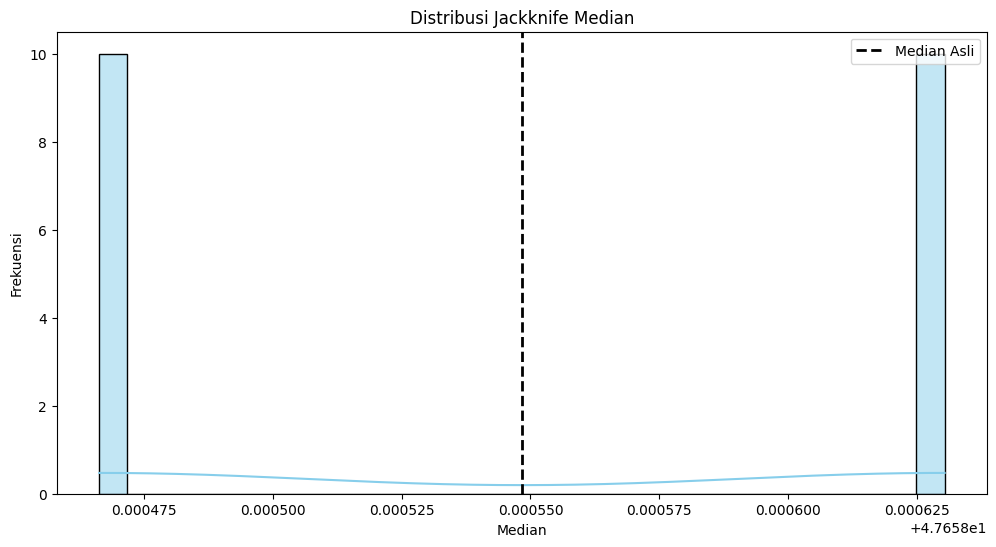

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi Jackknife median
plt.figure(figsize=(12, 6))
sns.histplot(jackknife_medians, kde=True, color='skyblue', bins=30)
plt.axvline(np.median(data), color='black', linestyle='dashed', linewidth=2, label="Median Asli")
plt.title("Distribusi Jackknife Median")
plt.xlabel("Median")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# **Interpretasi Grafik**
> **Grafik Jackknife Median (1 Data Dihapus Setiap Kali))**
* Sumbu X (Median): Nilai median hasil dari masing-masing Jackknife sample.
* Sumbu Y (Frekuensi): Seberapa sering nilai ,median tersebut muncul setiap 1 data dihapus
* Setiap nilai muncul sebanyak 10 kali, artinya dari 20 kali iterasi Jackknife, hanya ada 2 nilai median yang muncul secara bergantian. Dengan dua nilai dominan (di kiri dan kanan).

> **Pola Distribusi**
* Tidak seperti mean yang menghasilkan beragam nilai, median cenderung lebih kaku atau diskret, apalagi untuk ukuran sampel kecil (n=20).
* Penghapusan satu data mungkin tidak cukup memengaruhi posisi tengah secara drastis, sehingga median tidak banyak berubah.

> **Kurva KDE (Kernel Density Estimation)**
* Garis biru muda memperlihatkan estimasi distribusi halus dari histogram.
* Kurvanya cukup datar dan lebar → ini bisa disebabkan oleh jumlah data Jackknife yang kecil (hanya 20 poin), jadi KDE rendah dan belum terlalu smooth.

> **Kesimpulan:** Distribusi Jackknife Median sangat terbatas (hanya dua nilai), mencerminkan ketidakpekaan median terhadap penghapusan satu observasi. Median bisa dibilang robust, tetapi kurang variatif untuk analisis Jackknife pada dataset kecil.

In [15]:
import numpy as np

def confidence_interval(values, confidence=0.95):
    mean = np.mean(values)
    sem = np.std(values, ddof=1) / np.sqrt(len(values))  # standard error of mean
    z_score = 1.96  # For 95% CI
    margin_of_error = z_score * sem
    return mean - margin_of_error, mean + margin_of_error

# Hitung Confidence Interval 95% untuk Jackknife
ci_jackknife_mean = confidence_interval(jackknife_means)
ci_jackknife_median = confidence_interval(jackknife_medians)
ci_jackknife_variance = confidence_interval(jackknife_variances)

# Cetak hasilnya
print("🎯 95% Confidence Intervals (Jackknife):")
print(f"Mean     : [{ci_jackknife_mean[0]:.2f}, {ci_jackknife_mean[1]:.2f}]")
print(f"Median   : [{ci_jackknife_median[0]:.2f}, {ci_jackknife_median[1]:.2f}]")
print(f"Variance : [{ci_jackknife_variance[0]:.2f}, {ci_jackknife_variance[1]:.2f}]")

🎯 95% Confidence Intervals (Jackknife):
Mean     : [48.07, 48.51]
Median   : [47.66, 47.66]
Variance : [84.68, 89.95]


## **CI**

> **Confidence Interval (CI)** 95% memberikan rentang nilai yang diharapkan mengandung nilai parameter populasi yang sesungguhnya dengan tingkat kepercayaan 95%.
* **Mean CI** [47.38, 49.16]: Artinya, berdasarkan data jackknife, kita yakin dengan tingkat kepercayaan 95% bahwa rata-rata nilai parameter populasi berada di antara 47.38 dan 49.16.
* **Median CI** [47.66, 47.66]: Tingkat kepercayaan 95% bahwa median populasi terletak di antara 47.66 dan 47.66.
* **Variance CI** [75.27, 92.15]: Tingkat kepercayaan 95% bahwa varians populasi berada dalam rentang 75.27, 92.15.

> Sehingga, **CI** adalah gambaran ketidakpastian dalam estimasi, dan dengan Jackknife, kami dapat meminimalkan bias dan memverifikasi ketahanan estimasi terhadap perubahan data.